To start with, upload the images in your directory


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import the fastai libraries

In [0]:
from fastai import *
from fastai.vision import *

Define the path of your images

In [0]:
folder = 'egungun'
file = 'egungun.csv'

In [0]:
folder = 'not_egungun'
file = 'not_egungun.csv'

In [0]:
path = Path('data/images')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
path.ls()

# **Load the Data and View**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4)

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [32]:
data.classes, data.c

(['egungun', 'not_egungun'], 2)

# Train the model using Resnet50

In [0]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

In [34]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [35]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.731405,0.135757,0.063492,00:06
1,0.411951,0.013181,0.000000,00:03
2,0.278698,0.000569,0.000000,00:03
3,0.209596,0.000130,0.000000,00:03
4,0.169319,0.000147,0.000000,00:03
5,0.151659,0.000506,0.000000,00:03
6,0.130855,0.000699,0.000000,00:03
7,0.111679,0.000150,0.000000,00:03
8,0.107276,0.000175,0.000000,00:04
9,0.096299,0.000545,0.000000,00:03


Save the trained model path


In [0]:
learn.save('stage-1')

# Intepret and Plot Losses

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

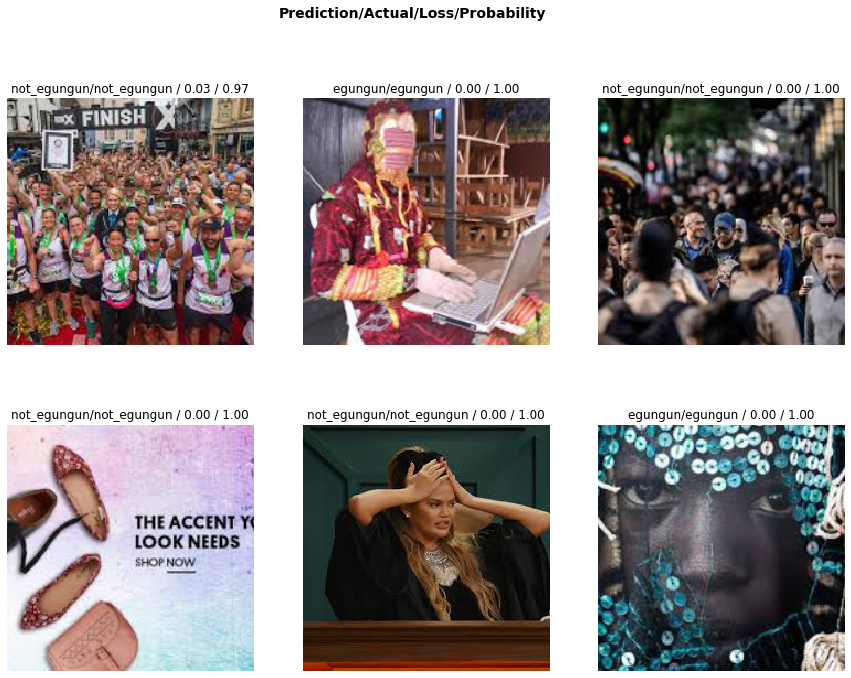

In [38]:
interp.plot_top_losses(6, figsize=(15,11))

# Train the entire 50 layers of the model

In [0]:
learn.unfreeze()

In [40]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.021107,0.001976,0.000000,00:05
1,0.013143,0.000261,0.000000,00:04
2,0.012434,0.000083,0.000000,00:04
3,0.011835,0.000123,0.000000,00:04


Save the model path


In [0]:
learn.save('stage-2')

# Optional
Save the model path on your google grive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model_save_name = 'classifier'
path = F"/content/gdrive/My Drive/{model_save_name}" 
learn.save(path)